<a href="https://colab.research.google.com/github/jangidprashantjee185045/ann/blob/project1/secondNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
tf.__version__

'2.5.0'

In [10]:
keras.__version__

'2.5.0'

In [11]:
fashion_mnist=keras.datasets.fashion_mnist

In [14]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

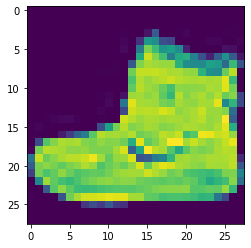

In [19]:
plt.imshow(X_train_full[0])

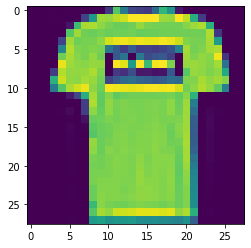

In [20]:
plt.imshow(X_train_full[1])

In [21]:
y_train_full[0]

9

In [22]:
class_names=["Tshirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [24]:
class_names[y_train_full[0]]

'Ankle boot'

In [26]:
X_train_n=X_train_full/255.0
X_test_n=X_test/255.0

In [28]:
X_train_n[0] # normalized values of pixel intensities

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [29]:
X_valid,X_train=X_train_n[:5000],X_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test_n

In [30]:
np.random.seed(42)

In [31]:
tf.random.set_seed(42)

In [33]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


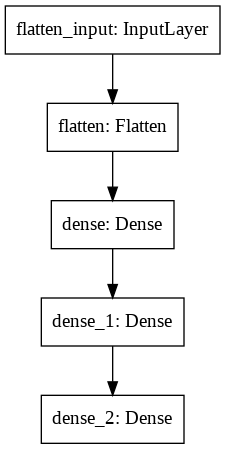

In [35]:
import pydot
keras.utils.plot_model(model)

In [36]:
weight,bias=model.layers[1].get_weights()

In [38]:
weight

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [39]:
weight.shape

(784, 300)

In [40]:
bias.shape

(300,)

In [45]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [46]:
model_history=model.fit(X_train,y_train,epochs=30,
                        validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 2ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4391 - accuracy: 0.8454 - val_loss: 0.5326 - val_accuracy: 0.7998
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4123 - accuracy: 0.8564 - val_loss: 0.3917 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3938 - accuracy: 0.8621 - val_loss: 0.3744 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3751 - accuracy: 0.8674 - val_loss: 0.3714 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3632 - accuracy: 0.8715 - val_loss: 0.3622 - val_accuracy:

In [47]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [49]:
model_history.history

{'accuracy': [0.7643091082572937,
  0.831818163394928,
  0.8454363346099854,
  0.8563636541366577,
  0.8620545268058777,
  0.8673818111419678,
  0.8714727163314819,
  0.8748182058334351,
  0.8787636160850525,
  0.8819817900657654,
  0.883545458316803,
  0.8866000175476074,
  0.8892363905906677,
  0.8914181590080261,
  0.8934909105300903,
  0.8969818353652954,
  0.897490918636322,
  0.9000363349914551,
  0.9026545286178589,
  0.9036181569099426,
  0.9058908820152283,
  0.9071999788284302,
  0.9083272814750671,
  0.9100909233093262,
  0.9120363593101501,
  0.9133090972900391,
  0.9158727526664734,
  0.9167272448539734,
  0.9188727140426636,
  0.9192181825637817],
 'loss': [0.7237028479576111,
  0.4841914176940918,
  0.4391070306301117,
  0.4123433828353882,
  0.39377954602241516,
  0.3750540018081665,
  0.36317017674446106,
  0.3516705632209778,
  0.34154313802719116,
  0.3321240544319153,
  0.3242468535900116,
  0.314983993768692,
  0.3081035017967224,
  0.3021441698074341,
  0.29462367

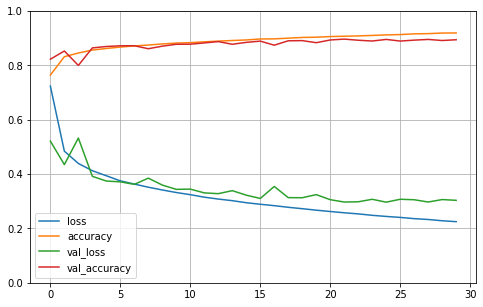

In [51]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [52]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3371 - accuracy: 0.8824


[0.337145060300827, 0.8823999762535095]

In [53]:
X_new=X_test[:3]

In [55]:
y_prob=model.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [56]:
y_prob=model.predict_classes(X_new)
y_prob

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [58]:
np.array(class_names)[y_prob]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

AxesImage(54,36;334.8x217.44)


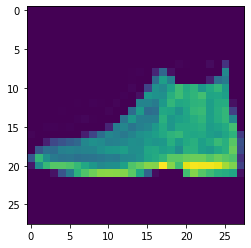

In [61]:
plt.imshow(X_test[0])

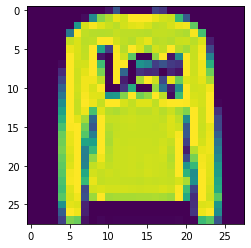

In [62]:
plt.imshow(X_test[1])

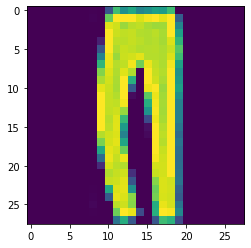

In [64]:
plt.imshow(X_test[2])